# Outline
* Questions
* Warm Up
* Load in Data
* Conduct Hypothesis Testing

# Objectives
YWBAT
- conduct a 1 samp and 2 samp ttest using scipy.stats
- test for criteria of 1 sample and 2 sample ttests

# Warm Up

In a zoom chat, send an example of a type II error

### What is a pvalue?
* A probability that a data point would fall in to a set ASSUMING H0 IS TRUE.
* The probability of an event occurring given the null hypothesis is true.
* Pvalues change based on the problem
* There is a debate on the validity of using Pvalues...

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as scs
from sklearn.datasets import load_iris

import statsmodels.api as sm
import statsmodels.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
data = iris.data
target = iris.target
features = iris.feature_names

In [3]:
df = pd.DataFrame(data, columns=features)
df['target'] = target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x])

In [5]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa

In [6]:
df.target_names.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa

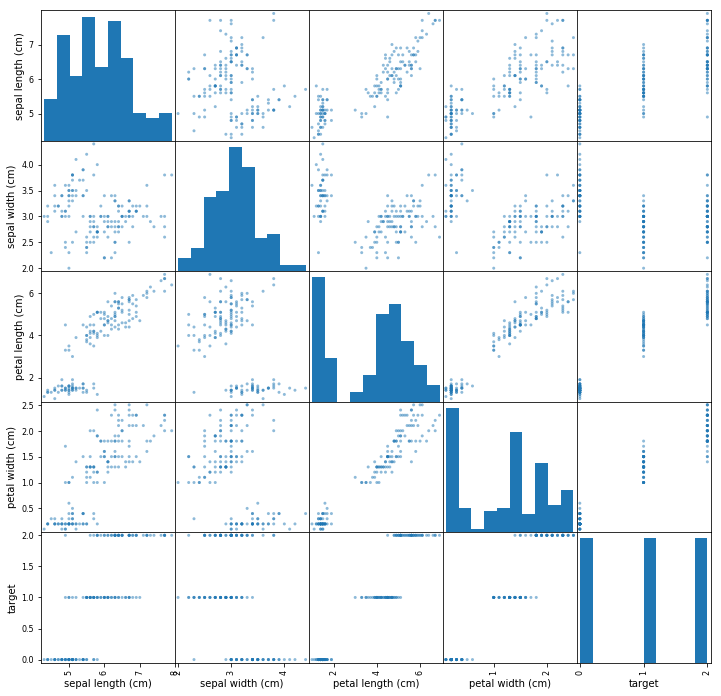

In [9]:
# pandas scattermatrix
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.show()

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


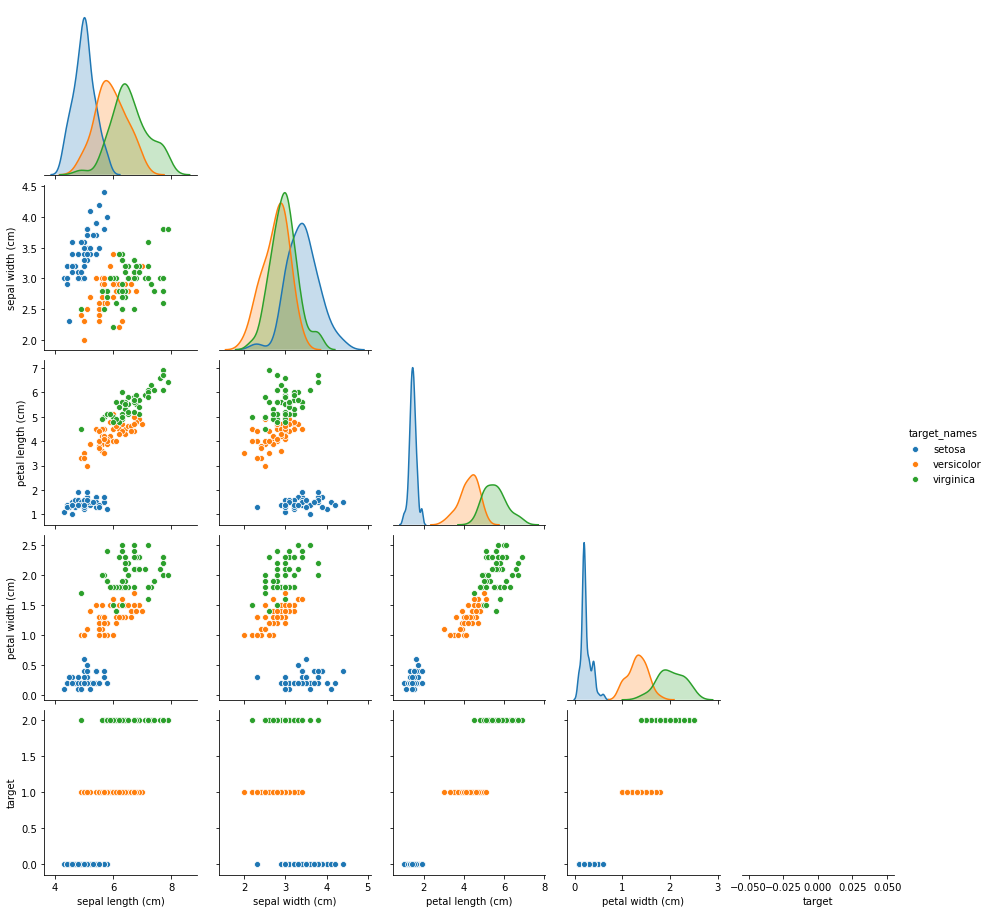

In [10]:
sns.pairplot(df, hue='target_names', corner=True)
plt.show()

# Q1. Is the mean sepal length different between virginica and versicolor iris flowers?

* get data
* ensure it's normal
* take sampling statistics to compare the mean
* run levene and shapiro tests
* calculate cohen's d 
* write up findings

In [11]:
sl_virg = df.loc[df['target_names']=='virginica', 'sepal length (cm)']
sl_vers = df.loc[df['target_names']=='versicolor', 'sepal length (cm)']

## what kind of test do we need to compare 2 populations? 
* 2 sample ttest

## what are the assumptions of a 2 sample ttest?
* data is continuous - yes
* data follows normal distribution - we need to test
* variances are equal (otherwise you have to run a different ttest) - we need to test
* independent - yes
* sample things correctly and randomly - yes


## what is the null and alternative hypothesis of a 2 sample ttest
* H0: $\mu_\text{virginica} = \mu_\text{versicolor}$
* HA: $\mu_\text{virginica} \neq \mu_\text{versicolor}$

* H0: mu_virginica = mu_versicolor
* HA: mu_virginica != mu_versicolor


# step 1: test for normality

In [12]:
sl_virg.shape, sl_vers.shape

((50,), (50,))

In [13]:
# if i'm testing the means, I don't care about the populations
# what should I be taking
sample_mus_virginica = []
sample_mus_versicolor = []
for i in range(30):
    virgSamp = np.random.choice(sl_virg, size=50, replace=True).mean()
    versSamp = np.random.choice(sl_vers, size=50, replace=True).mean()
    sample_mus_virginica.append(virgSamp)
    sample_mus_versicolor.append(versSamp)

In [14]:
# test each sample for normality using shapiro
# h0: data was drawn from a normal distribution 
# ha: data was not drawn from a normal distribution
# if p<0.05 reject the null otherwise
# p >= 0.05 fail to reject the null
t1, p1 = scs.shapiro(sample_mus_virginica)
t2, p2 = scs.shapiro(sample_mus_versicolor)

print(p1)
print(p2)

# since p > 0.05 in both cases we fail to reject that the data is normal
# therefore we can assume that our data is normal

0.9824318289756775
0.935992419719696


In [15]:
# test for equal variances using a levene test
# h0: samples are from populations with equal variances
# ha: samples are not from populations with equal variances

t, p = scs.levene(sample_mus_virginica, sample_mus_versicolor)
p
# since p>0.05 we fail to reject that the variances are equal
# therefore we can assume that our variances are equal

0.33812261694131196

In [16]:
# Now that our assumptions are met we can actually do a ttest

In [17]:
# h0: mu_virginica = mu_versicolor
# ha: mu_virginica != mu_versicolor
t, p = scs.ttest_ind(sample_mus_virginica, sample_mus_versicolor, equal_var=False)
p

1.7437233880790833e-39

## Initial Findings
After doing a sampling distribution of the mean and running a welch's ttest one can conclude that the mean sample length of each group is different. 

## Next Steps: Now let's measure how different these means are

In [18]:
# how do we measure difference of means? 
# power analysis

In [19]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return np.abs(np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)


In [20]:
effect_size = cohen_d(sample_mus_virginica, sample_mus_versicolor)
effect_size

8.899510337442127

In [21]:
from statsmodels.stats.power import TTestIndPower

In [22]:
analysis = TTestIndPower()

In [23]:
result = analysis.solve_power(effect_size=effect_size, nobs1=30, alpha=0.05)
result

1.0

In [24]:
type2error_rate = 1 - result
type2error_rate

0.0

# How do we interpret this? 
if you take a sample of versicolors or virginicas and measure the mean sepal length I can tell you with 100% certainity where the flowers came from.

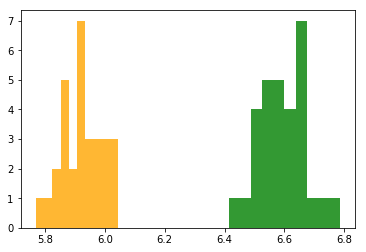

In [25]:
plt.hist(sample_mus_virginica, color='green', alpha=0.8)
plt.hist(sample_mus_versicolor, color='orange', alpha=0.8)
plt.show()

# Q2 Is the petal length different among any of the iris flowers (anova)

# What did we learn today?
* don't only eyeball normality
* shapiro and levene test
* pairplots are awesome and very useful for data viz
* power analysis
    * you'll always have 3 of 4 and it will always solve for the 4th
* input into the scatter matrix 
* cohen's d to measure the effect size 
* alpha=0.05 because it's standard

# Day 2 - ANOVA TESTING

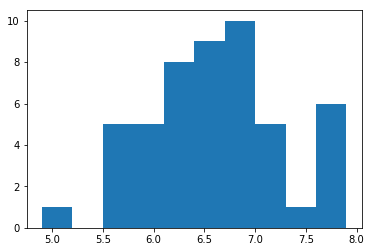

In [29]:
plt.hist(sl_virg)
plt.show()

In [38]:
sl_virg_zscores = scs.zscore(sl_virg)
random_zscores = np.random.normal(0, 1, 50)

In [41]:
# H0: sl_virg = normal distribution
# HA: sl_virg != normal distribution
scs.kstest(sl_virg_zscores, 'norm', args=(0, 1)) 

# pvalue of 0, which means we reject the null

KstestResult(statistic=0.11558941328638006, pvalue=0.48764984405744605)

In [31]:
random_normal_data = np.random.normal(50, 10, 1000)

In [42]:
# H0: random_normal_data = normal distribution
# HA: random_normal_data != normal distribution
scs.kstest(random_normal_data, 'norm', args=(50, 10))  
# pvalue of 0, which means we reject the null

KstestResult(statistic=0.03540056710981665, pvalue=0.15929441756654197)

In [43]:
def ks_test(arr):
    zscores_arr = scs.zscore(arr)
    t, p = scs.kstest(zscores_arr, 'norm', args=(0, 1))
    return t, p

In [44]:
ks_test(sl_virg)

(0.11558941328638006, 0.48764984405744605)

In [45]:
scs.anderson(sl_virg, 'norm')

AndersonResult(statistic=0.5516407106574732, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# In summary
Shapiro Wilks is less strict than a KS Test
- use both

# ANOVA Testing
**When**
* Multiple Comparisons
* Number of Ice Cream sold by Flavors
* Sepal Length of all iris flowers (3)
* Drug Testing (more than 2 groups)
* Testing more than 2 groups

**What does it tell you?**
* H0: u1 = u2 = ... = uN
* HA: ui!=uj for some i and j in our groups

In [47]:
sl_seto = df.loc[df['target_names']=='setosa', 'sepal length (cm)']

# step 1: take bootstrap sampling distributions

In [48]:
sl_sd_virg = []
sl_sd_vers = []
sl_sd_seto = []

for i in range(30):
    s1 = np.random.choice(sl_seto, 50, replace=True).mean()
    s2 = np.random.choice(sl_vers, 50, replace=True).mean()
    s3 = np.random.choice(sl_virg, 50, replace=True).mean()
    sl_sd_seto.append(s1)
    sl_sd_vers.append(s2)
    sl_sd_virg.append(s3)

# step 2: test each sampling distribution for normality

In [50]:
for samp in [sl_sd_seto, sl_sd_vers, sl_sd_virg]:
    t, p = ks_test(samp)
    print(t, p)

# pvalues > 0.05 -> data is normal

0.07106849093676221 0.9981258672951128
0.10135268270444081 0.9175703455910869
0.1179278228199826 0.7983071102773645


# step 3: test for equal variances

In [56]:
# H0: input samples are from equal variances
# HA: input samples are not from equal variances

scs.bartlett(sl_sd_seto, sl_sd_vers, sl_sd_virg)
# p<=0.05 -> reject the null variances are not equal the differenc of spreads isn't greater than 3

BartlettResult(statistic=17.335422788020647, pvalue=0.00017205241417272234)

# step4:  ANOVA test

In [55]:
# H0: u1 = ... = un
# HA: ui!=uj
scs.f_oneway(sl_sd_seto, sl_sd_vers, sl_sd_virg)

# p<0.05 reject the null

F_onewayResult(statistic=3518.8142885838843, pvalue=5.941971274788364e-84)

In [59]:
df['sl'] = df['sepal length (cm)']

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [61]:
model = ols('sl ~ C(target_names)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df           F        PR(>F)
C(target_names)  63.212133    2.0  119.264502  1.669669e-31
Residual         38.956200  147.0         NaN           NaN

# Conclusion
the sepal of at least one group is different than the another group

# Comparing multiple groups

In [62]:
mc = stats.multicomp.MultiComparison(df['sepal length (cm)'], df['target_names'])

In [63]:
res = mc.tukeyhsd()
print(res)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93 0.001 0.6862 1.1738   True
    setosa  virginica    1.582 0.001 1.3382 1.8258   True
versicolor  virginica    0.652 0.001 0.4082 0.8958   True
---------------------------------------------------------


In [64]:
for col in df.columns[:4]:
    mc = stats.multicomp.MultiComparison(df[col], df['target_names'])
    print(f"Testing: {col}")
    res = mc.tukeyhsd()
    print(res)
    print("\n\n")

Testing: sepal length (cm)
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93 0.001 0.6862 1.1738   True
    setosa  virginica    1.582 0.001 1.3382 1.8258   True
versicolor  virginica    0.652 0.001 0.4082 0.8958   True
---------------------------------------------------------



Testing: sepal width (cm)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658  0.001 -0.8189 -0.4971   True
    setosa  virginica   -0.454  0.001 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------



Testing: petal length (cm)
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   m